# CLASSIFICAÇÃO

## DEVEMOS CONSTRUIR A NOSSA BASE

## 1 - MÉTRICAS

In [46]:
from sklearn.metrics import *
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def acuracia(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Acurácia: {accuracy}")
    
def erro(y_test, y_pred):
    error = 1 - accuracy_score(y_test, y_pred)
    print(f"Erro: {error}")
    
def recall(y_test, y_pred):
    sensibilidade = recall_score(y_test, y_pred)
    print(f"Recall: {sensibilidade}")
    return sensibilidade
    
def especificidade(y_test, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn + fp)
    print(f"Specificity: {specificity}")
    
def precisao(y_test, y_pred):
    precision = precision_score(y_test, y_pred)
    print(f"Precisao: {precision}")
    return precision
    
def f1_score(y_test, y_pred):
    numerador = 2 * precisao(y_test, y_pred) * recall(y_test, y_pred)
    denominador = precisao(y_test, y_pred) + recall(y_test, y_pred)
    f1 = numerador / denominador
    print(f"F1 Score: {f1}")
    
def auc(y_test, y_pred_prob):
    area = roc_auc_score(y_test, y_pred_prob)
    print(f"AUC: {area}")
    
def auc_roc(y_test, y_pred_prob):
    area = roc_auc_score(y_test, y_pred_prob)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % area)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
def matriz(y, y_test, y_pred):
    matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10,7))
    sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=np.unique(y), yticklabels=np.unique(y))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion matrix')
    plt.show()

def mar(y_test, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    miss_alarm_rate = fn / (fn + tp)
    print(f"Miss Alarm Rate: {miss_alarm_rate}")

def far(y_test, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    false_alarm_rate = fp / (fp + tn)
    print(f"Miss Alarm Rate: {false_alarm_rate}")
    
def ks(y_test, y_pred_prob):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    ks_statics = max(tpr - fpr)
    print(f"KS: {ks_statics}")
    
def metricas(clf, y, y_test, y_pred):
    y_pred_prob = clf.predict_proba(y)[:, 1]
    acuracia(y_test, y_pred)
    erro(y_test, y_pred)
    recall(y_test, y_pred)
    especificidade(y_test, y_pred)
    precisao(y_test, y_pred)
    f1_score(y_test, y_pred)
    auc(y_test, y_pred_prob)
    auc_roc(y_test, y_pred_prob)
    matriz(y, y_test, y_pred)
    mar(y_test, y_pred)
    far(y_test, y_pred)
    ks(y_test, y_pred_prob)

## 2 - TRATAR OS DADOS

In [47]:
import pandas as pd

df = pd.read_csv("./dataset/cs-training.csv", index_col=False)

df.fillna(0, inplace=True)

## KNN

Acurácia: 0.9314
Erro: 0.0686
Recall: 0.023715415019762844
Precisao: 0.36923076923076925
Recall: 0.023715415019762844
Precisao: 0.36923076923076925
Recall: 0.023715415019762844
F1 Score: 0.04456824512534818
Precisao: 0.36923076923076925
              precision    recall  f1-score   support

           0       0.93      1.00      0.96     41964
           1       0.37      0.02      0.04      3036

    accuracy                           0.93     45000
   macro avg       0.65      0.51      0.50     45000
weighted avg       0.90      0.93      0.90     45000

AUC: 0.5678142435658194


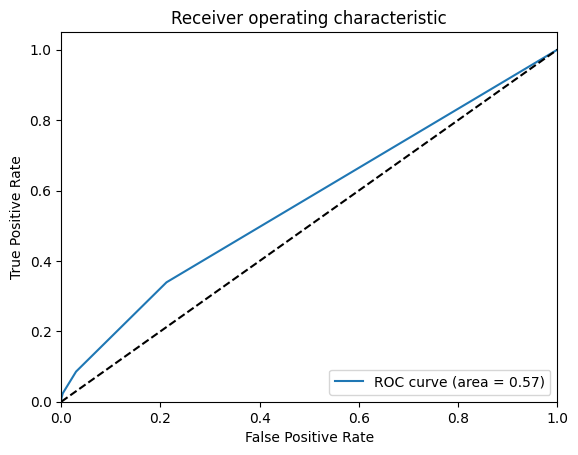

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

colunas = ['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents']

x = df[colunas]
y = df["SeriousDlqin2yrs"]

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3)

knn = KNeighborsClassifier()

knn.fit(x_treino, y_treino)

previsto = knn.predict(x_teste)
previsto_prob = knn.predict_proba(x_teste)[:, 1]

acuracia(y_teste, previsto)
erro(y_teste, previsto)
recall(y_teste, previsto)  
f1_score(y_teste, previsto)
precisao(y_teste, previsto)
print(classification_report(y_teste, previsto))
auc(y_teste, previsto_prob)
auc_roc(y_teste, previsto_prob)

## REDES NEURAIS

# SVM

# DECISION TREE

## RANDOM FLOREST

## GRADIENT BOOSTING

## NAIVE BAYES